# *Offline Handwritten-Character Recognition*


### Approach used
1: Building model classifier using a CNN architecture.

2: Apply character segmentation for the handwritten word image.

3: Classify each segmented letter and then get the final word in the image.

### Importing the necessary modules

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

### Feature independence plot 

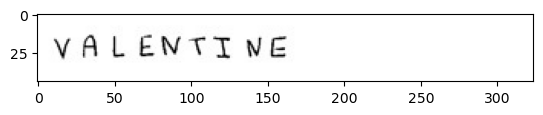

In [2]:
img1=plt.imread("D:/DDASE/test/TEST_0007.jpg")
img1=np.array(img1)
implot=plt.imshow(img1, cmap='hot')

### Dataset Importation
 Our dataset was downlaoded and was found to contain separate folders for train and validation
#### Importing training dataset 
Storing it into a list for ease of access and operability
os.path.join() concatenates the file path of a the imported images with a specific image for it to be read and stored in a list
os.listdir() method in python is used to get the list of all files and directories in the specified directory. If we don’t specify any directory, then list of files and directories in the current working directory will be returned.


In [3]:
dir = "D:/mDa/dataset/train/" 
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i) 
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [4]:
len(train_data)

18104

### Importing our validation set
cv2.imread() method loads an image from the specified file. If the image cannot be read (because of missing file, improper permissions, unsupported or invalid format) then this method returns an empty matrix.
Syntax: cv2.imread(path, flag)
Parameters:path: A string representing the path of the image to be read. flag: It specifies the way in which image should be read. It’s default value is cv2.IMREAD_COLOR
Return Value: This method returns an image that is loaded from the specified file.

In [5]:
val_dir = "D:/mDa/dataset/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [6]:
len(val_data)

15209

### The shuffle() method takes a sequence, like a list, and reorganize the order of the items.

This method changes the original list, it does not return a new list.

In [7]:
random.shuffle(train_data)
random.shuffle(val_data)

### Splitting our train data into x and y i.e features and labels

In [9]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)
    
    

### Splitting our validation data into x and y i.e features and labels



In [10]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

### Binarisation, converting of our labels into binary digits

In [11]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

### Converting our dataset into a numpy array

In Machine Learning, Python uses the image data in the format of height, width and Channel format. i.e. Images are converted into Numpy Array in height, width, channel format.
Hence, to save time during training, it is useful to convert a dataset of images to numpy arrays.
By dividing the array by 255.0, we normalise the data to a scale from 0 to 1

Images and their pixel values range from 0 to 256. Each number represents a color code. When using the image as it is and passing through a Deep Neural Network, the computation of high numeric values may become more complex and to reduce this we normalize the values to range from 0 to 1.

In this way, the numbers will be small and the computation becomes easier and faster. As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1.

In [12]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [13]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

### Analysing the shape(dimensions) of our train and validation sets

In [14]:
print(train_X.shape,val_X.shape)

(18104, 32, 32, 1) (15209, 32, 32, 1)


In [15]:
print(train_Y.shape,val_Y.shape)

(18104, 35) (15209, 35)


### Creating the Convolution Neural Network(CNN) model and hyperparameter tuning
Hyperparameters are the variables which determines the network structure and the variables which determine how the network is trained. The hyperparameters to tune are the number of neurons, activation function, optimizer, learning rate, batch size, and epochs.

In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

### Model compilation

In [18]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

### Model Training

In [19]:
history = model.fit(train_X,train_Y, epochs=70
                    , batch_size=32, validation_data = (val_X, val_Y),  verbose=2)

Epoch 1/70
566/566 - 26s - loss: 1.1997 - accuracy: 0.6706 - val_loss: 0.4215 - val_accuracy: 0.8685 - 26s/epoch - 47ms/step
Epoch 2/70
566/566 - 22s - loss: 0.4706 - accuracy: 0.8537 - val_loss: 0.2849 - val_accuracy: 0.9133 - 22s/epoch - 40ms/step
Epoch 3/70
566/566 - 23s - loss: 0.3612 - accuracy: 0.8861 - val_loss: 0.2302 - val_accuracy: 0.9270 - 23s/epoch - 41ms/step
Epoch 4/70
566/566 - 22s - loss: 0.3029 - accuracy: 0.9018 - val_loss: 0.1886 - val_accuracy: 0.9392 - 22s/epoch - 39ms/step
Epoch 5/70
566/566 - 23s - loss: 0.2639 - accuracy: 0.9127 - val_loss: 0.1554 - val_accuracy: 0.9480 - 23s/epoch - 41ms/step
Epoch 6/70
566/566 - 22s - loss: 0.2297 - accuracy: 0.9231 - val_loss: 0.1518 - val_accuracy: 0.9462 - 22s/epoch - 40ms/step
Epoch 7/70
566/566 - 22s - loss: 0.2164 - accuracy: 0.9264 - val_loss: 0.1337 - val_accuracy: 0.9528 - 22s/epoch - 39ms/step
Epoch 8/70
566/566 - 23s - loss: 0.1919 - accuracy: 0.9338 - val_loss: 0.1251 - val_accuracy: 0.9553 - 23s/epoch - 41ms/step


566/566 - 23s - loss: 0.0437 - accuracy: 0.9845 - val_loss: 0.0113 - val_accuracy: 0.9955 - 23s/epoch - 41ms/step
Epoch 67/70
566/566 - 25s - loss: 0.0460 - accuracy: 0.9842 - val_loss: 0.0131 - val_accuracy: 0.9947 - 25s/epoch - 44ms/step
Epoch 68/70
566/566 - 23s - loss: 0.0433 - accuracy: 0.9849 - val_loss: 0.0103 - val_accuracy: 0.9973 - 23s/epoch - 40ms/step
Epoch 69/70
566/566 - 22s - loss: 0.0396 - accuracy: 0.9864 - val_loss: 0.0103 - val_accuracy: 0.9963 - 22s/epoch - 39ms/step
Epoch 70/70
566/566 - 23s - loss: 0.0404 - accuracy: 0.9849 - val_loss: 0.0129 - val_accuracy: 0.9954 - 23s/epoch - 41ms/step


### Accuracy and Loss plots as the model trains

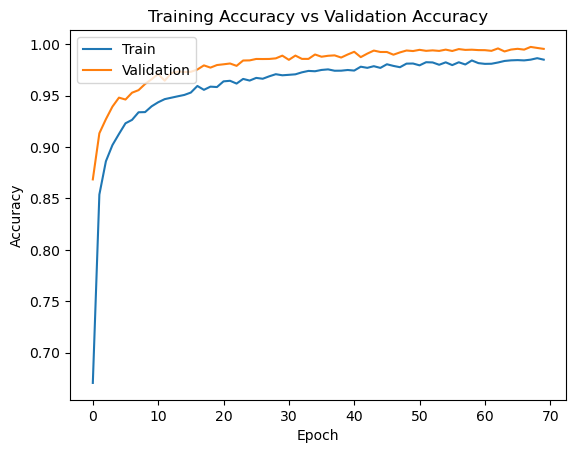

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

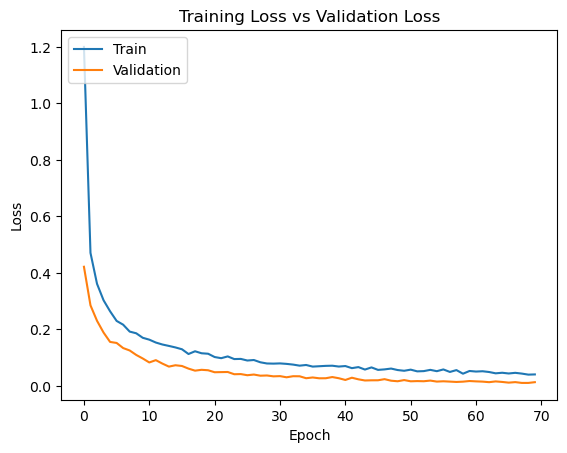

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
model.evaluate(val_X, val_Y)

476/476 [==============================] - 5s 11ms/step - loss: 0.0129 - accuracy: 0.9954


[0.012900217436254025, 0.9953974485397339]

### Recognition and Post-Processing 
1. The sort contours function is used to get the correct order of individual characters for correct output extraction. In this case for extracting a single word, a left to right sorting of individual characters is needed.
2. The get letters function fetches the list of letters and get word function gets the individual word. 

In [23]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [24]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

#plt.imshow(image)

In [25]:
def get_word(letter):
    word = "".join(letter)
    return word

1/1 [==============================] - 0s 22ms/step
4RIS


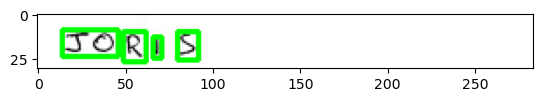

In [26]:
letter,image = get_letters("D:\\DDASE\\test\\TEST_0047.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 23ms/step
CFKCLIWG


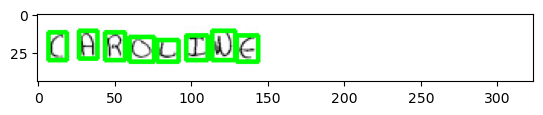

In [28]:
letter,image = get_letters("D:\\DDASE\\test\\TEST_0040.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 24ms/step
MILLC


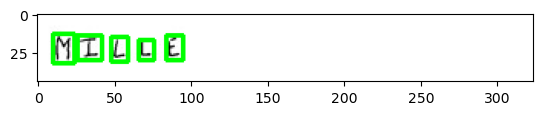

In [29]:
letter,image = get_letters("D:\\DDASE\\test\\TEST_0039.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 28ms/step
VALFNTJNF


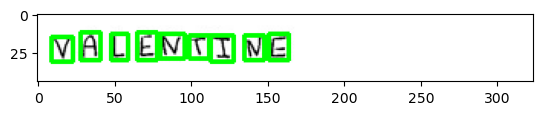

In [30]:
letter,image = get_letters("D:/DDASE/test/TEST_0007.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

## In Conclusion,
Line segmentation, word segmentation, character segmentation, classification, post-processing. These steps are followed
